<div align = "center">
    <h4>High Quality Graphics in R</h4>
</div>

**Base R plotting**

In [1]:
head(DNase)

,Run,conc,density
,<ord>,<dbl>,<dbl>
1,1,0.04882812,0.017
2,1,0.04882812,0.018
3,1,0.19531250,0.121
4,1,0.19531250,0.124
5,1,0.39062500,0.206
6,1,0.39062500,0.215


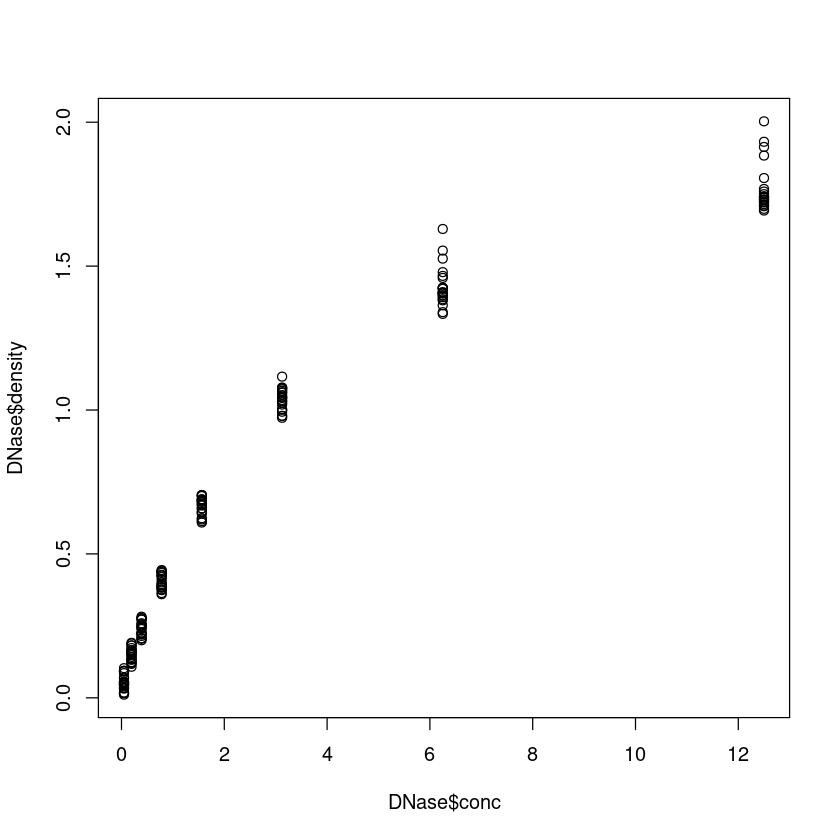

In [2]:
plot(DNase$conc, DNase$density)

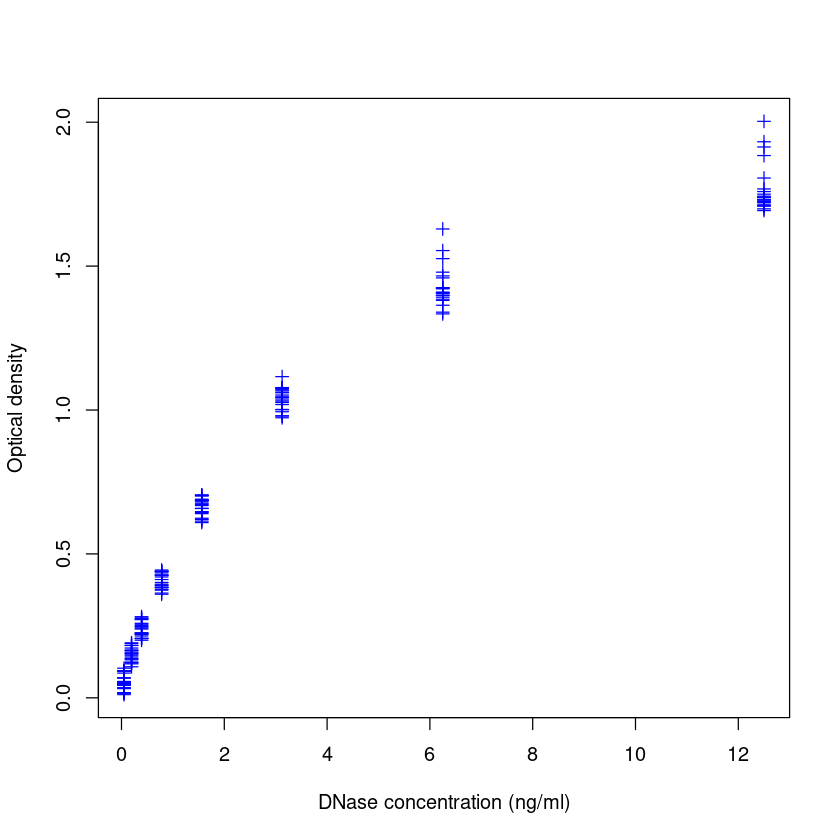

In [5]:
plot(DNase$conc, DNase$density, 
     ylab = attr(DNase,'labels')$y,
     xlab = paste(attr(DNase, 'labels')$x, attr(DNase, 'units')$x),
     pch = 3,
     col = 'blue')

Besides scatterplots, we can also use built-in functions to create **histograms** and **boxplots**

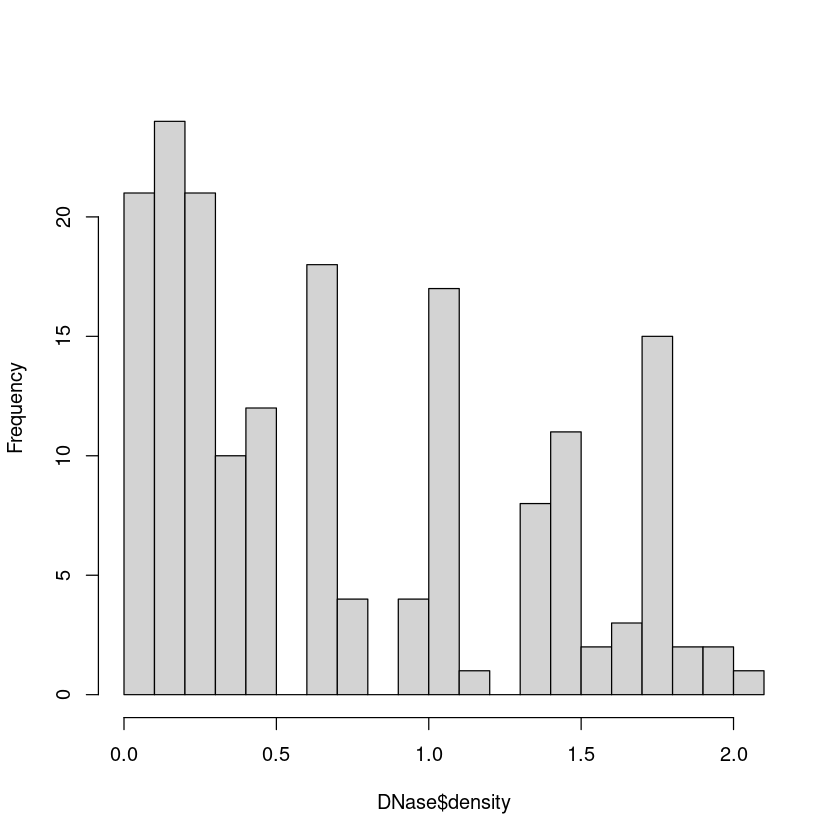

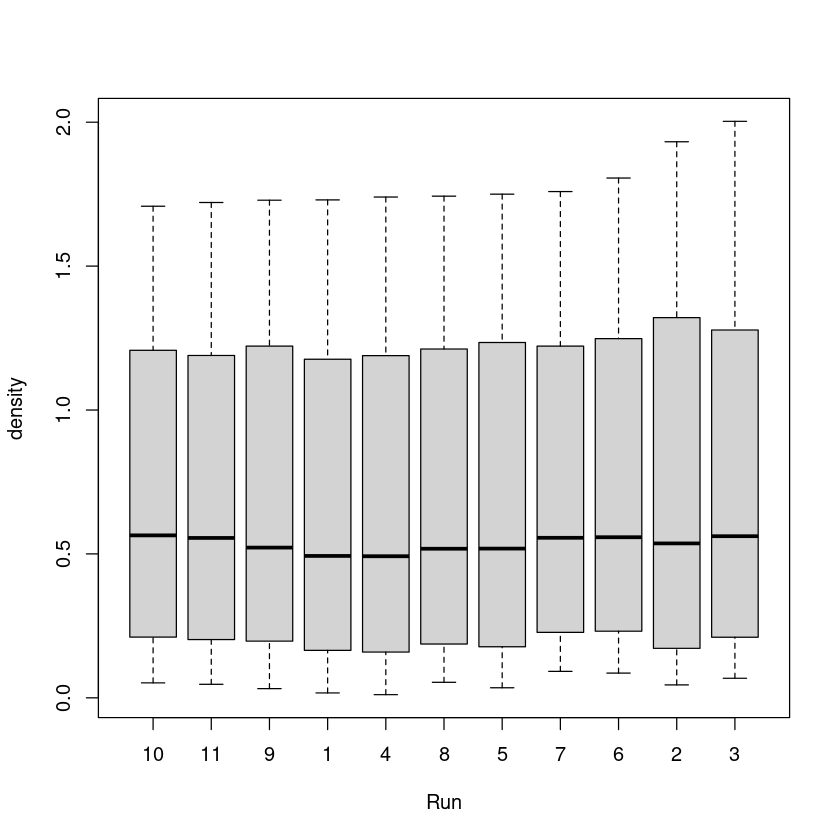

In [6]:
hist(DNase$density, breaks=25, main = "")
boxplot(density ~ Run, data = DNase)

**An example dataset**

In [16]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("Hiiragi2013")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.22), R 4.1.2 (2021-11-01)

Installing package(s) 'Hiiragi2013'

also installing the dependencies ‘org.Mm.eg.db’, ‘mouse4302.db’


Installation paths not writeable, unable to update packages
  path: /usr/lib/R/library
  packages:
    boot, class, cluster, codetools, foreign, KernSmooth, lattice, MASS, mgcv,
    nlme, nnet, rpart, spatial, survival

Old packages: 'askpass', 'BH', 'brio', 'bslib', 'callr', 'cli', 'commonmark',
  'cowplot', 'cpp11', 'crosstalk', 'curl', 'data.table', 'DBI', 'dbplyr',
  'deldir', 'desc', 'digest', 'dplyr', 'dqrng', 'evaluate', 'fansi', 'FNN',
  'fontawesome', 'future', 'future.apply', 'ggplot2', 'ggrepel', 'ggridges',
  'ggsci', 'globals', 'glue', 'gplots', 'gtable', 'gtools', 'haven',
  'htmltools', 'htmlwidgets', 'httpu

In [14]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("Biobase")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.22), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'Biobase'”
Installation paths not writeable, unable to update packages
  path: /usr/lib/R/library
  packages:
    boot, class, cluster, codetools, foreign, KernSmooth, lattice, MASS, mgcv,
    nlme, nnet, rpart, spatial, survival

Old packages: 'askpass', 'BH', 'brio', 'bslib', 'callr', 'cli', 'commonmark',
  'cowplot', 'cpp11', 'crosstalk', 'curl', 'data.table', 'DBI', 'dbplyr',
  'deldir', 'desc', 'digest', 'dplyr', 'dqrng', 'evaluate', 'fansi', 'FNN',
  'fontawesome', 'future', 'future.apply', 'ggplot2', 'ggrepel', 'ggridges',
  'ggsci', 'globals', 'glue', 'gplots', 'gtable', 'gtools', 'haven',


In [21]:
library("Hiiragi2013")
data("x")
dim(Biobase::exprs(x))

[1] 45101   101

In [18]:
head(pData(x), n = 2)

,File.name,Embryonic.day,Total.number.of.cells,lineage,genotype,ScanDate,sampleGroup,sampleColour
,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<chr>,<chr>
1 E3.25,1_C32_IN,E3.25,32,,WT,2011-03-16,E3.25,#CAB2D6
2 E3.25,2_C32_IN,E3.25,32,,WT,2011-03-16,E3.25,#CAB2D6


In [20]:
library("dplyr")
groups = group_by(pData(x), sampleGroup) |>
  summarise(n = n(), color = unique(sampleColour))
groups

sampleGroup,n,color
<chr>,<int>,<chr>
E3.25,36,#CAB2D6
E3.25 (FGF4-KO),17,#FDBF6F
E3.5 (EPI),11,#A6CEE3
E3.5 (FGF4-KO),8,#FF7F00
E3.5 (PE),11,#B2DF8A
E4.5 (EPI),4,#1F78B4
E4.5 (FGF4-KO),10,#E31A1C
E4.5 (PE),4,#33A02C


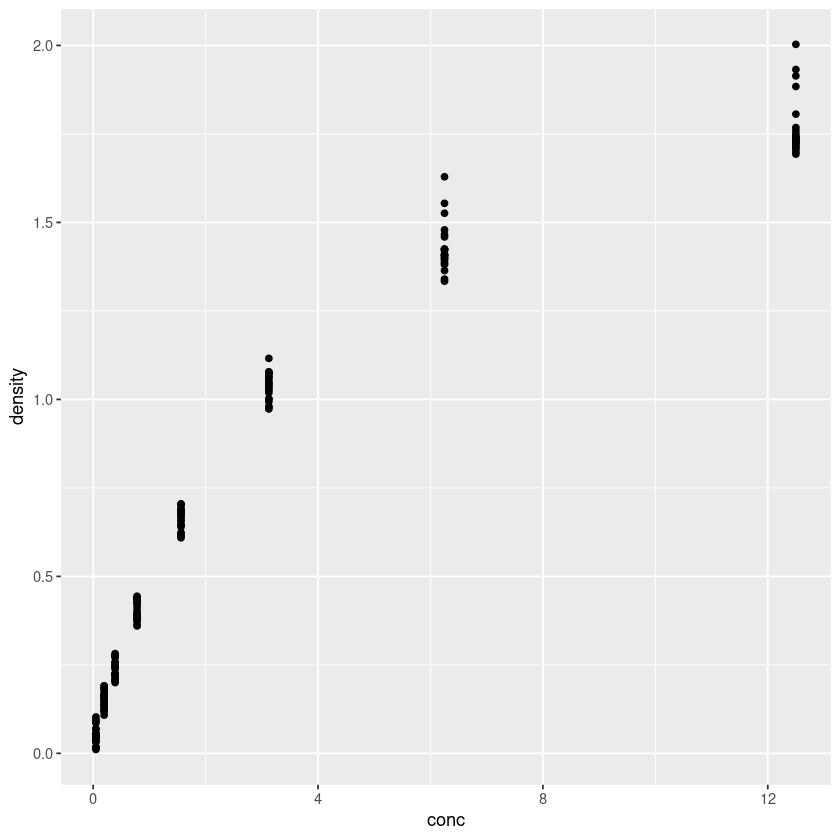

In [22]:
library("ggplot2")
ggplot(DNase, aes(x = conc, y = density)) + geom_point()

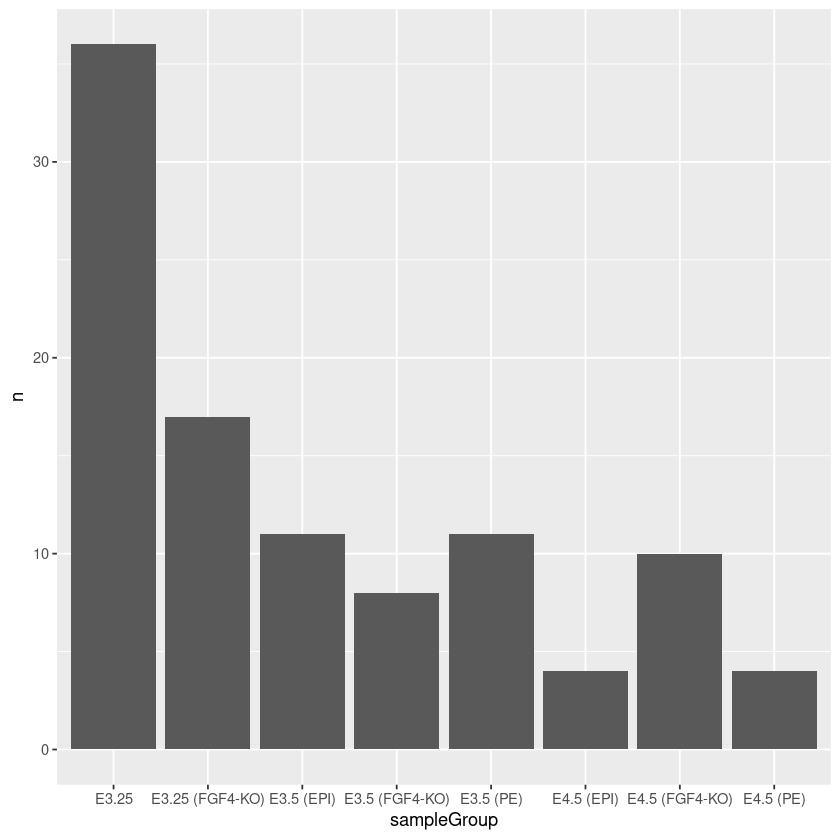

In [23]:
ggplot(groups, aes(x = sampleGroup, y = n)) +
  geom_bar(stat = "identity")

In [24]:
groupColor = setNames(groups$color, groups$sampleGroup)

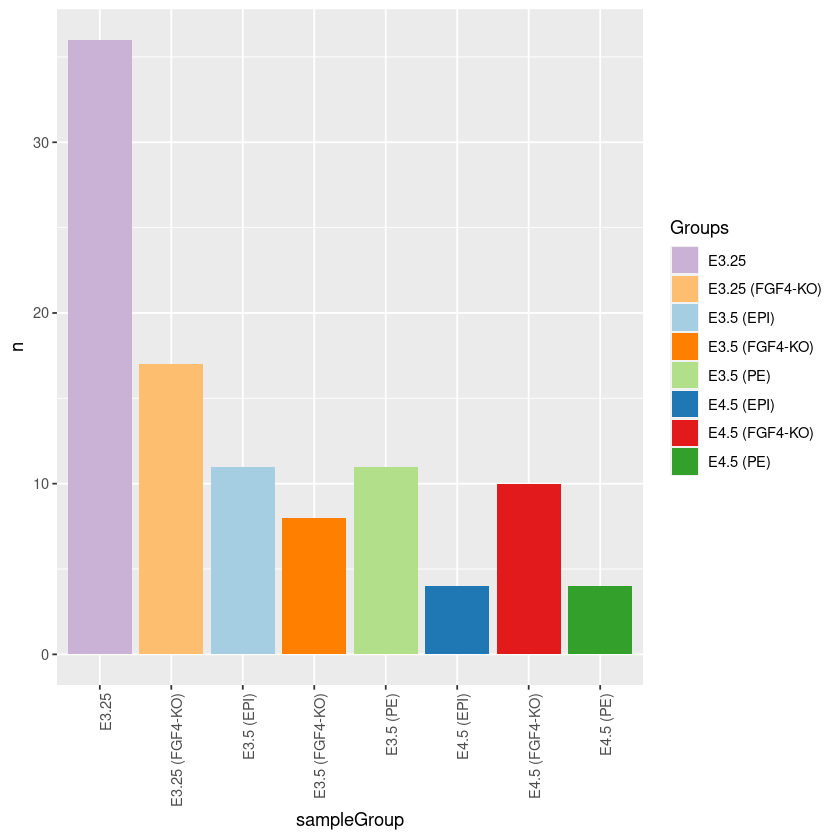

In [25]:
ggplot(groups, aes(x = sampleGroup, y = n, fill = sampleGroup)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = groupColor, name = "Groups") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

**Saving figures**

In [26]:
gg = ggplot(DNase, aes(x = conc, y = density)) + geom_point()

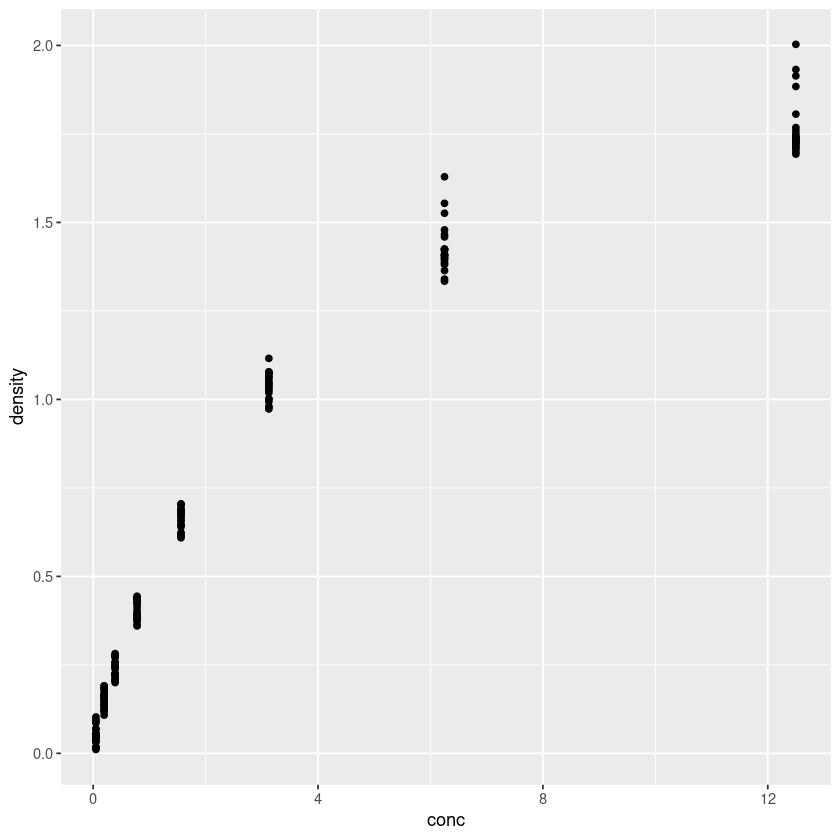

In [27]:
gg

In [28]:
ggplot2::ggsave("DNAse-histogram-demo.pdf", plot = gg)

Saving 6.67 x 6.67 in image


**The grammar of graphics**

`geom_smooth()` using formula = 'y ~ x'


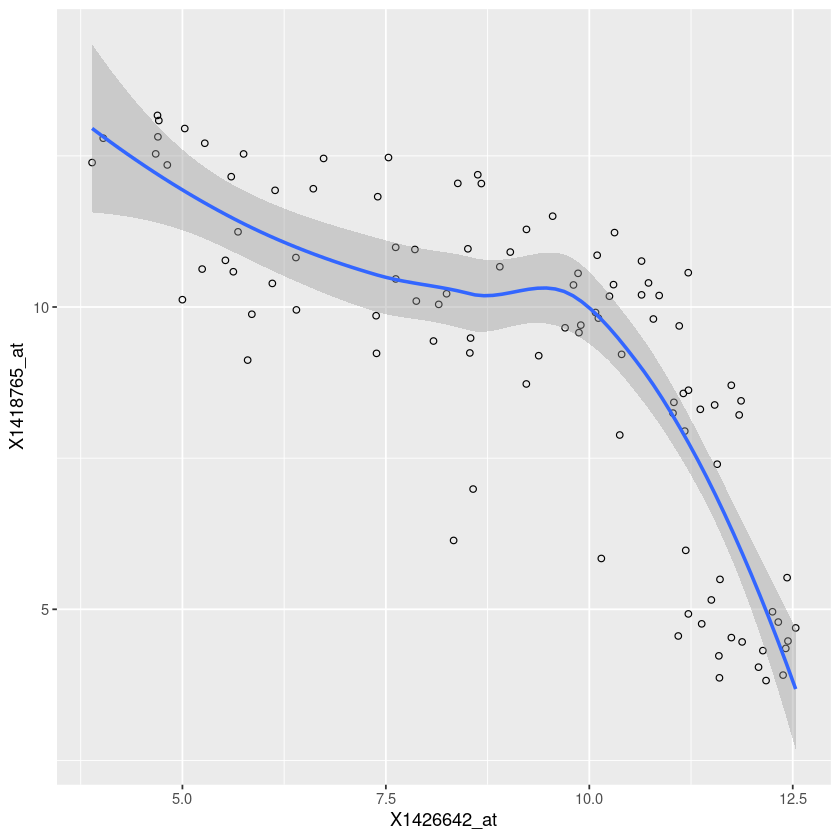

In [29]:
dftx = data.frame(t(Biobase::exprs(x)), pData(x))
ggplot( dftx, aes( x = X1426642_at, y = X1418765_at )) +
  geom_point( shape = 1 ) +
  geom_smooth( method = "loess" )

`geom_smooth()` using formula = 'y ~ x'


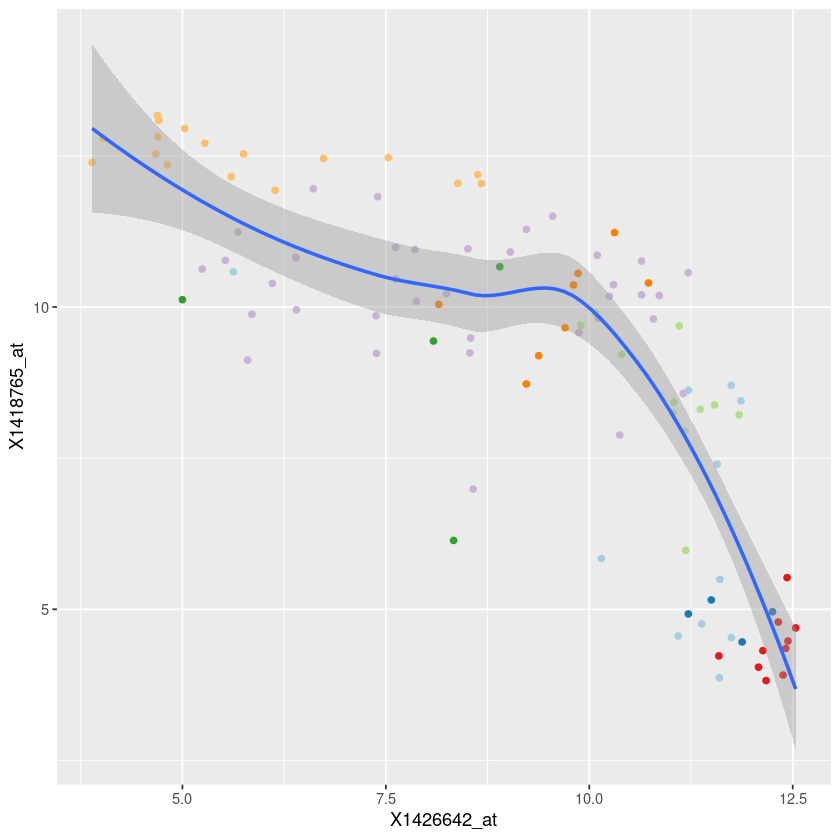

In [30]:
ggplot(dftx, aes(x = X1426642_at, y = X1418765_at))  +
  geom_point(aes(color = sampleGroup), shape = 19) +
  scale_color_manual(values = groupColor, guide = "none") +
  geom_smooth(method = "loess")

In [31]:
AnnotationDbi::select(mouse4302.db,
   keys = c("1426642_at", "1418765_at"), keytype = "PROBEID",
   columns = c("SYMBOL", "GENENAME"))

'select()' returned 1:1 mapping between keys and columns



PROBEID,SYMBOL,GENENAME
<chr>,<chr>,<chr>
1426642_at,Fn1,fibronectin 1
1418765_at,Timd2,T cell immunoglobulin and mucin domain containing 2


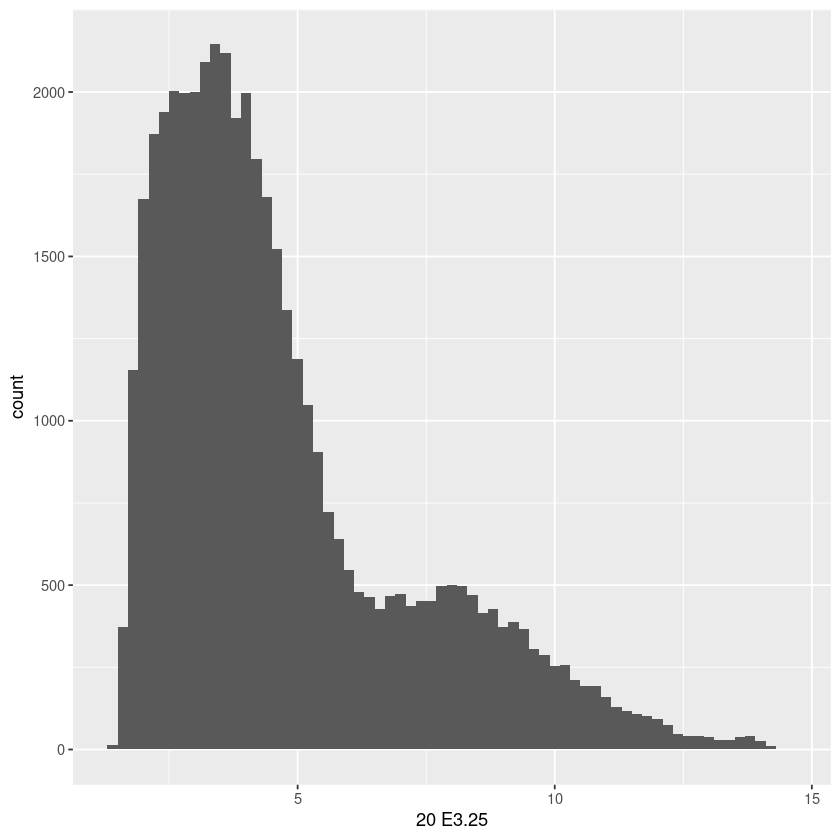

In [32]:
dfx = as.data.frame(Biobase::exprs(x))
ggplot(dfx, aes(x = `20 E3.25`)) + geom_histogram(binwidth = 0.2)

In [33]:
pb = ggplot(groups, aes(x = sampleGroup, y = n))
class(pb)

[1] "gg"     "ggplot"

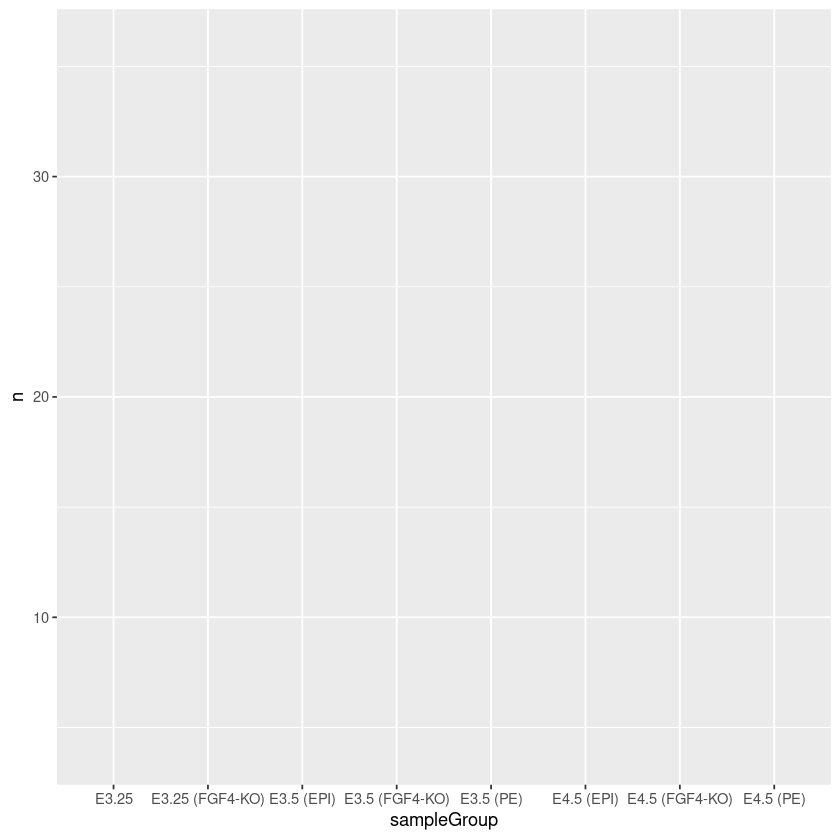

In [34]:
pb

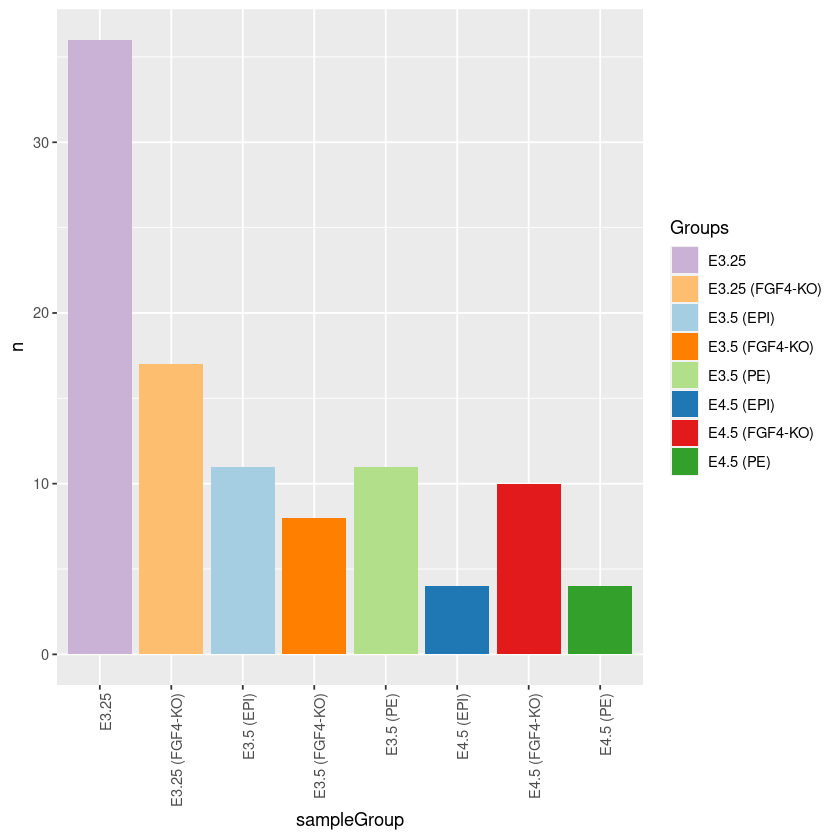

In [35]:
pb = pb + geom_bar(stat = "identity")
pb = pb + aes(fill = sampleGroup)
pb = pb + theme(axis.text.x = element_text(angle = 90, hjust = 1))
pb = pb + scale_fill_manual(values = groupColor, name = "Groups")
pb

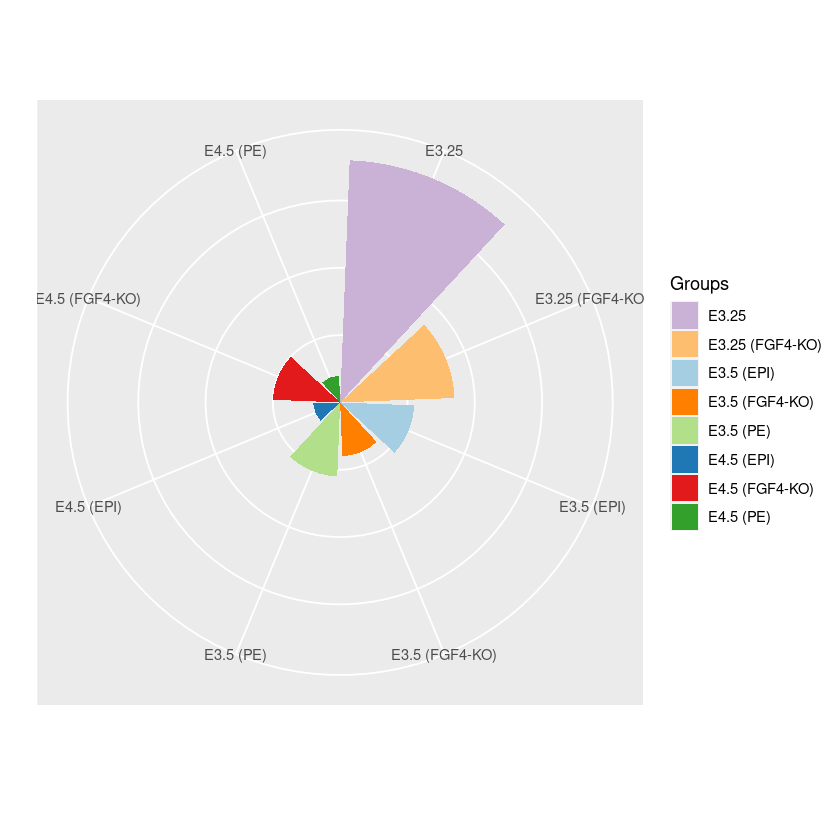

In [36]:
pb.polar = pb + coord_polar() +
  theme(axis.text.x = element_text(angle = 0, hjust = 1),
        axis.text.y = element_blank(),
        axis.ticks = element_blank()) +
  xlab("") + ylab("")
pb.polar

**Visualizing data in 1D**

In [37]:
selectedProbes = c( Fgf4 = "1420085_at", Gata4 = "1418863_at",
                   Gata6 = "1425463_at",  Sox2 = "1416967_at")

In [38]:
library("reshape2")
genes = melt(Biobase::exprs(x)[selectedProbes, ],
             varnames = c("probe", "sample"))

In [39]:
genes$gene =
  names(selectedProbes)[match(genes$probe, selectedProbes)]
head(genes)

,probe,sample,value,gene
,<fct>,<fct>,<dbl>,<chr>
1,1420085_at,1 E3.25,3.027715,Fgf4
2,1418863_at,1 E3.25,4.843137,Gata4
3,1425463_at,1 E3.25,5.500618,Gata6
4,1416967_at,1 E3.25,1.731217,Sox2
5,1420085_at,2 E3.25,9.293016,Fgf4
6,1418863_at,2 E3.25,5.530016,Gata4


**Barplots**

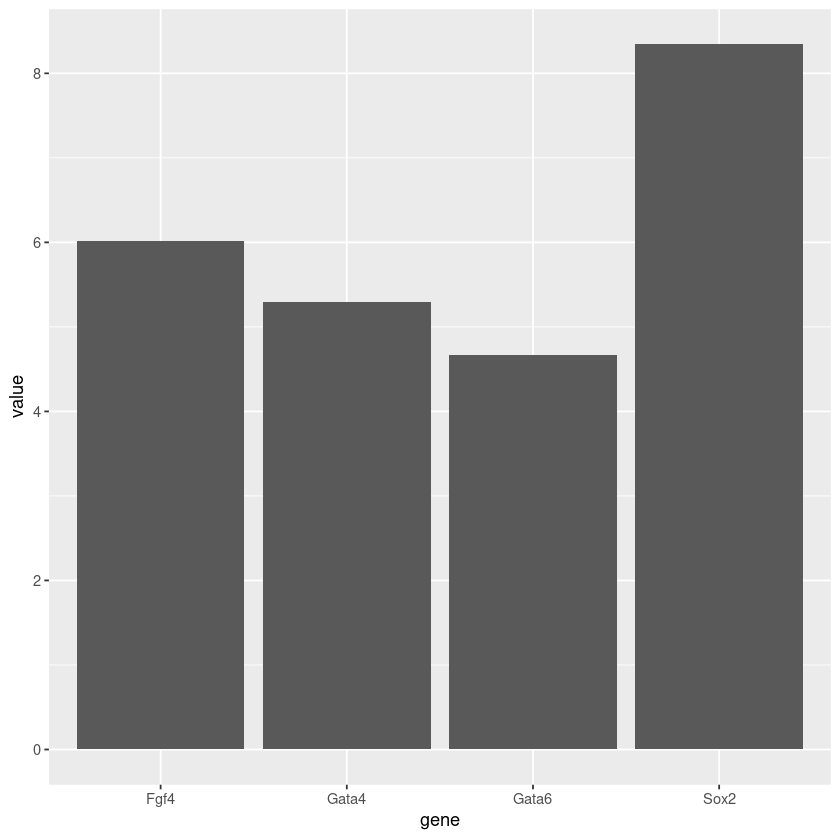

In [40]:
ggplot(genes, aes(x = gene, y = value)) +
  stat_summary(fun = mean, geom = "bar")

In [42]:
install.packages("Hmisc")

Installing package into ‘/home/ms/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlTable’, ‘viridis’, ‘Formula’




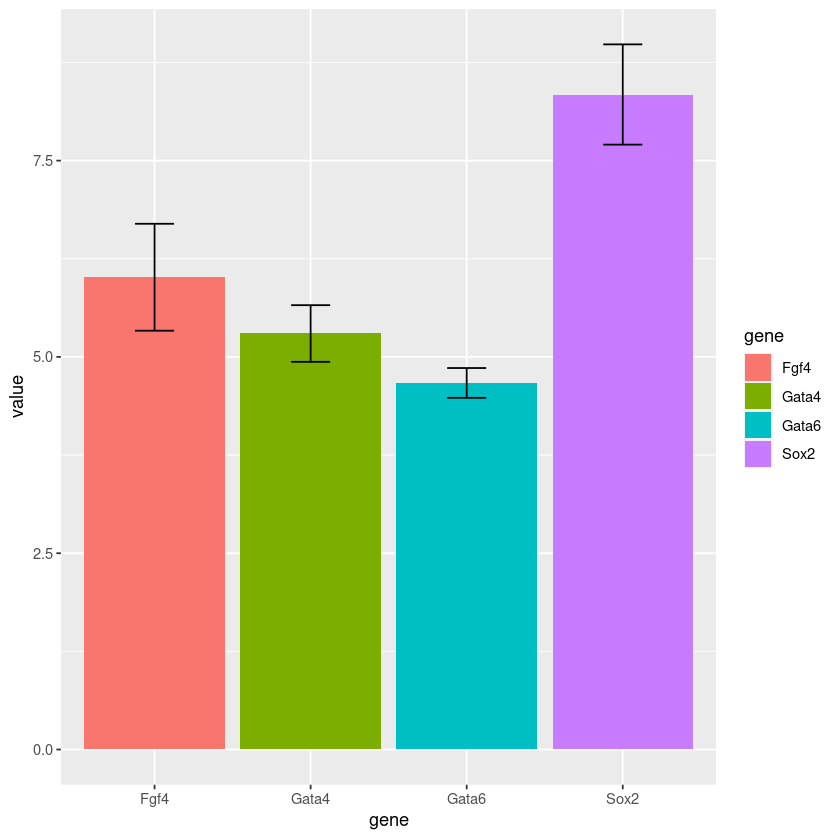

In [45]:
library("Hmisc")
ggplot(genes, aes( x = gene, y = value, fill = gene)) +
  stat_summary(fun = mean, geom = "bar") +
  stat_summary(fun.data = mean_cl_normal, geom = "errorbar",
               width = 0.25)

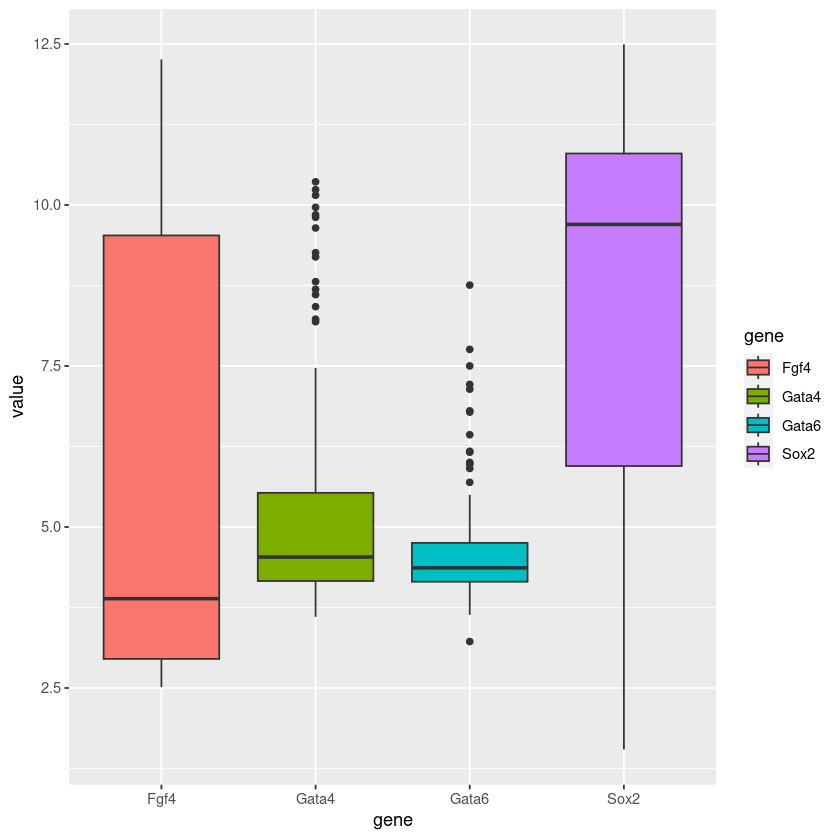

In [44]:
p = ggplot(genes, aes( x = gene, y = value, fill = gene))
p + geom_boxplot()

**Dot plots and beeswarm plots**

In [47]:
install.packages("ggbeeswarm")

Installing package into ‘/home/ms/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

also installing the dependencies ‘beeswarm’, ‘vipor’




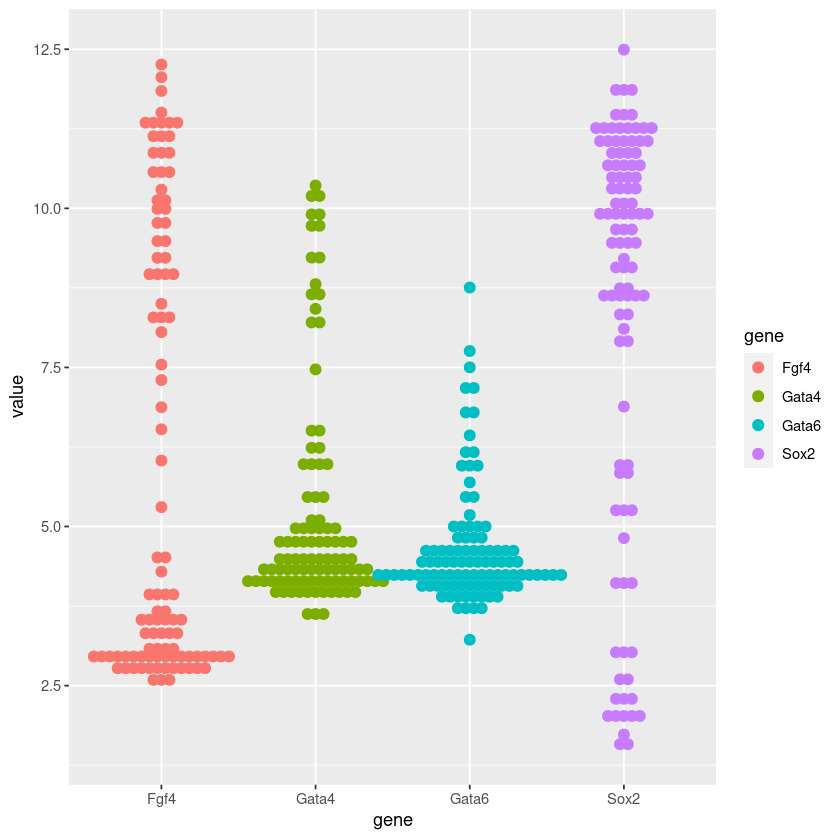

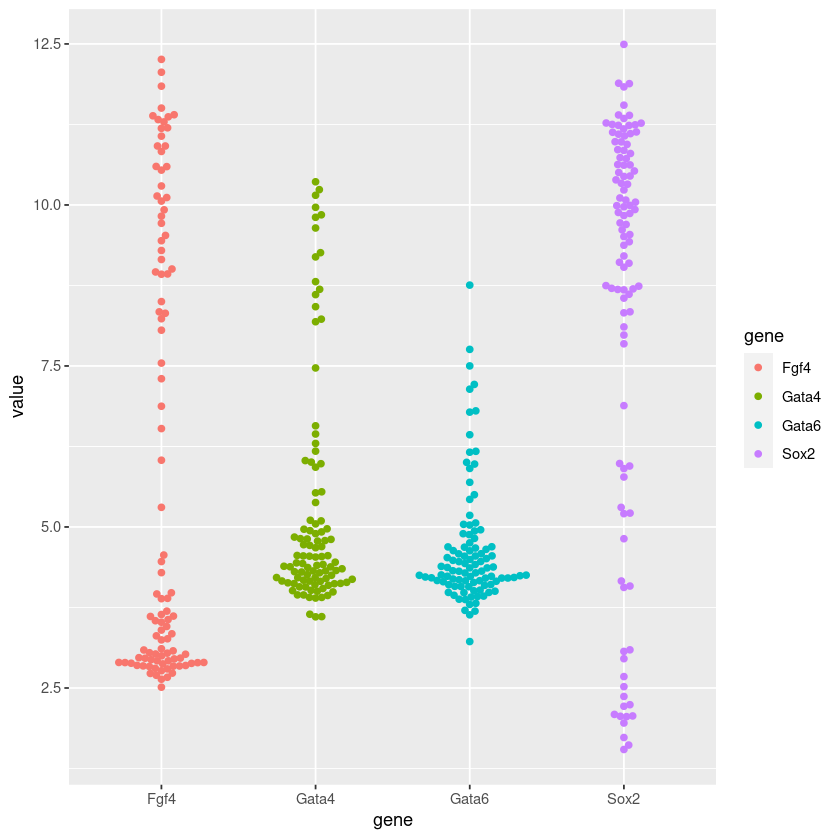

In [48]:
p + geom_dotplot(binaxis = "y", binwidth = 1/6,
       stackdir = "center", stackratio = 0.75,
       aes(color = gene))
library("ggbeeswarm")
p + geom_beeswarm(aes(color = gene))

**Density plots**

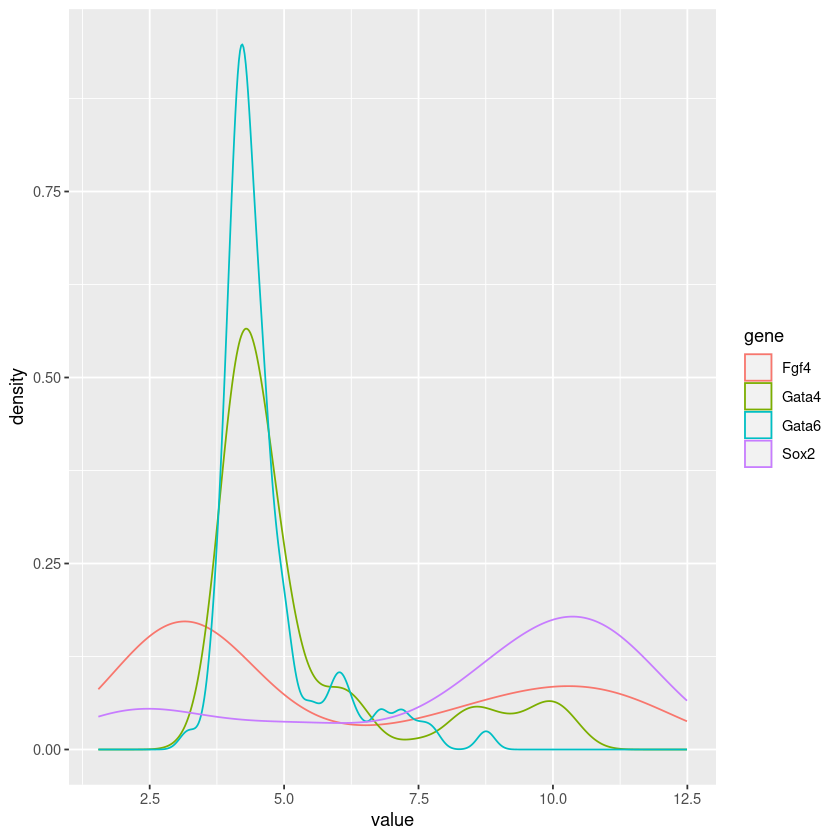

In [49]:
ggplot(genes, aes( x = value, color = gene)) + geom_density()

**Violin plots**

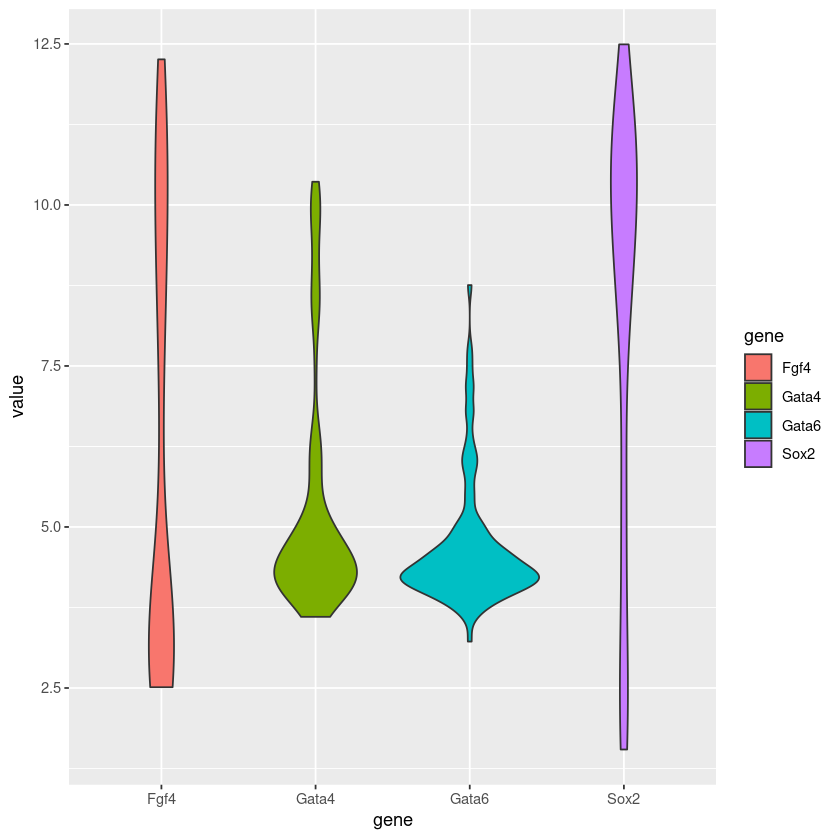

In [50]:
p + geom_violin()

**Ridgeline plots**

Picking joint bandwidth of 0.729



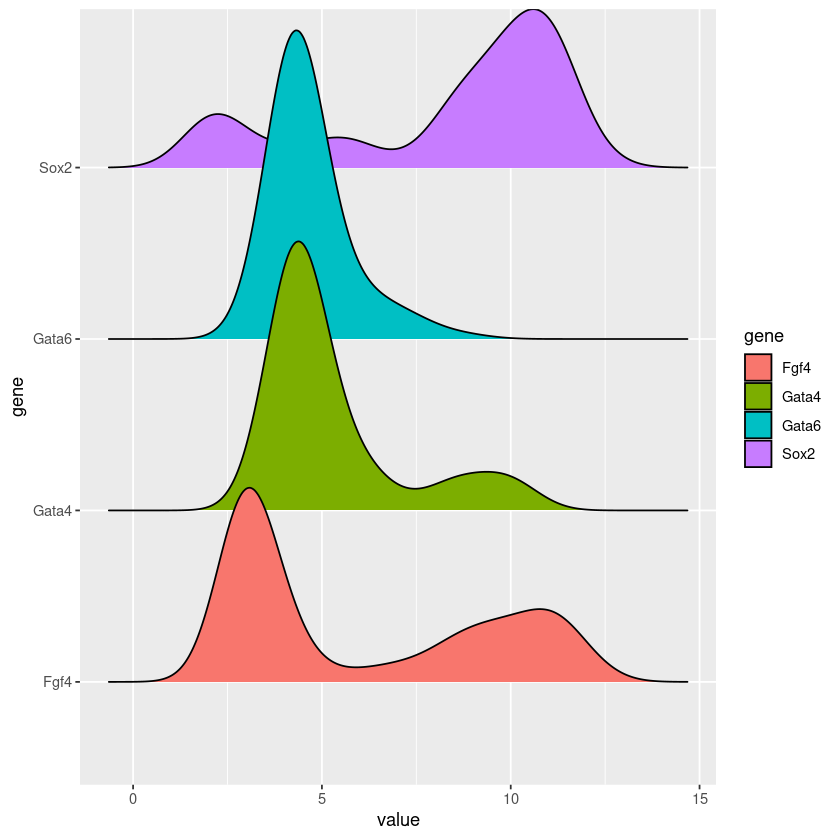

In [51]:
library("ggridges")
ggplot(genes, aes(x = value, y = gene, fill = gene)) + 
  geom_density_ridges()

**ECDF plots**

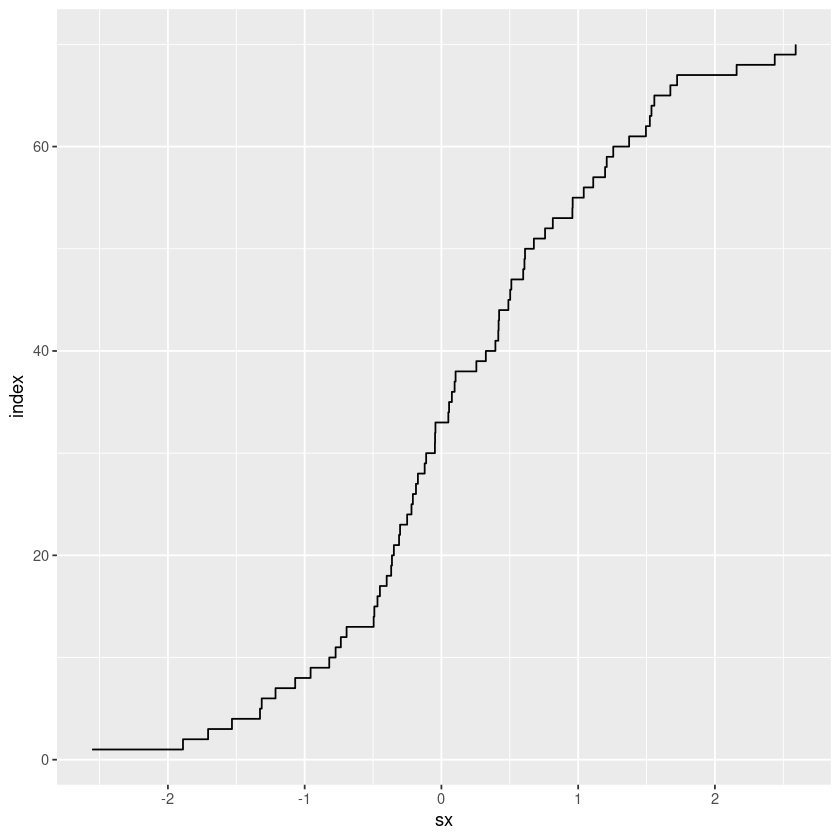

In [52]:
simdata = rnorm(70)
tibble(index = seq(along = simdata),
          sx = sort(simdata)) %>%
ggplot(aes(x = sx, y = index)) + geom_step()

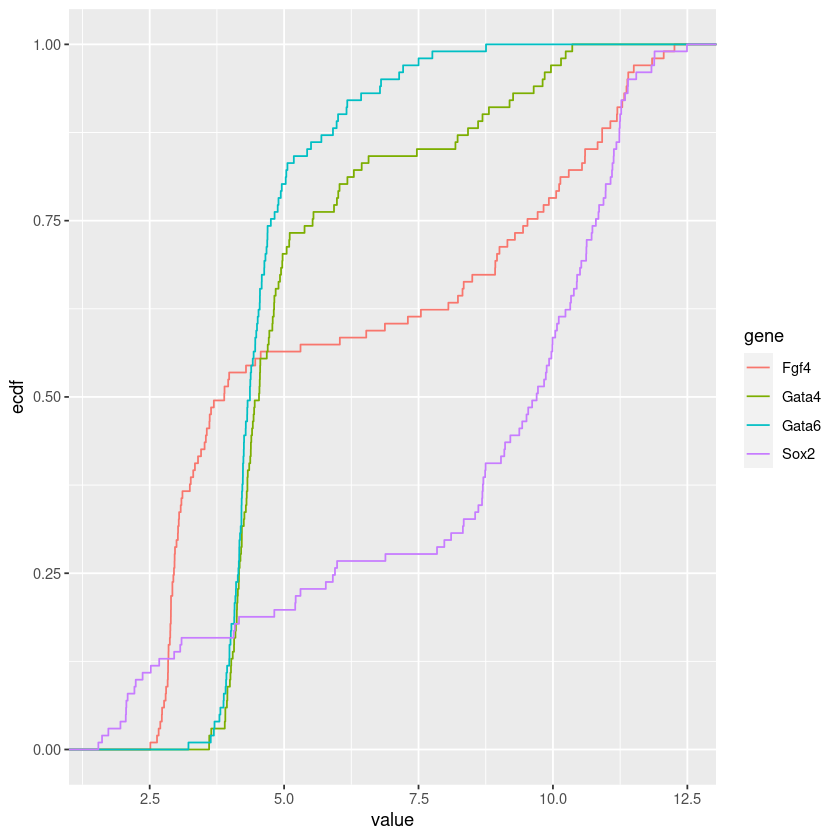

In [53]:
ggplot(genes, aes( x = value, color = gene)) + stat_ecdf()